In [43]:
# Regression Example With Boston Dataset: Baseline
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# load dataset
dataframe = read_csv("dati/BostonHousing.csv")
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [45]:
y = dataframe['MEDV'].values
dataframe = dataframe.drop(['MEDV'], axis = 1)
X = dataframe.values

In [46]:
X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]

In [47]:
X_train.shape

(400, 13)

In [48]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')


In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
80/80 [==============================] - 0s 800us/step - loss: 265.5988
Epoch 2/100
80/80 [==============================] - 0s 911us/step - loss: 162.3323
Epoch 3/100
80/80 [==============================] - 0s 825us/step - loss: 144.4443
Epoch 4/100
80/80 [==============================] - 0s 888us/step - loss: 128.6362
Epoch 5/100
80/80 [==============================] - 0s 892us/step - loss: 118.2804
Epoch 6/100
80/80 [==============================] - 0s 825us/step - loss: 106.7163
Epoch 7/100
80/80 [==============================] - 0s 925us/step - loss: 97.9318
Epoch 8/100
80/80 [==============================] - 0s 850us/step - loss: 90.4462
Epoch 9/100
80/80 [==============================] - 0s 912us/step - loss: 86.0868
Epoch 10/100
80/80 [==============================] - 0s 862us/step - loss: 81.5624
Epoch 11/100
80/80 [==============================] - 0s 887us/step - loss: 76.4027
Epoch 12/100
80/80 [==============================] - 0s 850us/step - loss: 70.

In [50]:
history.history

{'loss': [265.59881591796875,
  162.33233642578125,
  144.44427490234375,
  128.63621520996094,
  118.28041076660156,
  106.71631622314453,
  97.93177795410156,
  90.44615173339844,
  86.08677673339844,
  81.56236267089844,
  76.4027099609375,
  70.88751983642578,
  67.94844055175781,
  64.29357147216797,
  60.209197998046875,
  57.004024505615234,
  55.69612121582031,
  52.95244598388672,
  49.924129486083984,
  47.97028732299805,
  45.711517333984375,
  43.80085372924805,
  42.67079162597656,
  41.368919372558594,
  39.65147018432617,
  38.2326774597168,
  36.735111236572266,
  36.793495178222656,
  35.01108169555664,
  33.89279556274414,
  34.9190788269043,
  32.07957458496094,
  31.5330867767334,
  30.7535343170166,
  31.062227249145508,
  30.779857635498047,
  28.584897994995117,
  28.973756790161133,
  28.101581573486328,
  27.598909378051758,
  26.823013305664062,
  26.96363067626953,
  25.021860122680664,
  25.746381759643555,
  25.536876678466797,
  25.034265518188477,
  23.93

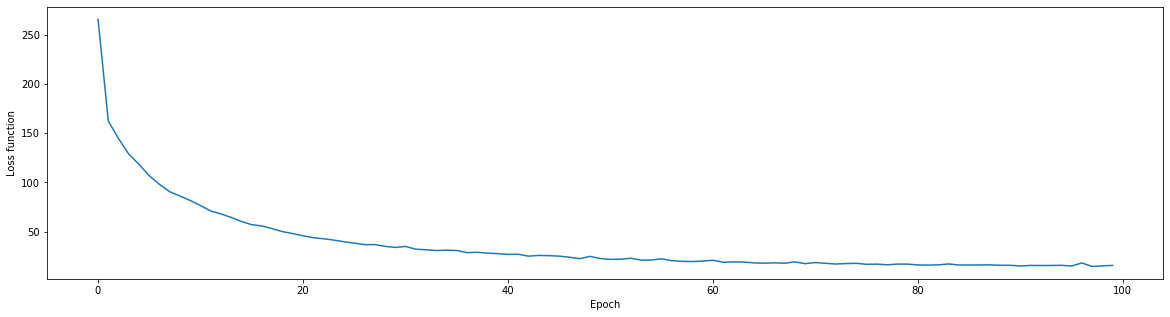

In [51]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.show()

In [52]:
previsioni = []
for i in X_test: 
    print(i)
    print(i.shape)
    i = np.reshape(i, (1, 13))
    yhat = model.predict(i)
    print(yhat)
    print(yhat[0][0])
    previsioni.append(yhat[0][0])

[ 25.0461   0.      18.1      0.       0.693    5.987  100.       1.5888
  24.     666.      20.2     26.77     0.    ]
(13,)
[[9.19072]]
9.19072
[ 14.2362   0.      18.1      0.       0.693    6.343  100.       1.5741
  24.     666.      20.2     20.32     0.    ]
(13,)
[[13.225141]]
13.225141
[  9.59571   0.       18.1       0.        0.693     6.404   100.
   1.639    24.      666.       20.2      20.31      0.     ]
(13,)
[[14.041826]]
14.041826
[ 24.8017   0.      18.1      0.       0.693    5.349   96.       1.7028
  24.     666.      20.2     19.77     0.    ]
(13,)
[[10.520579]]
10.520579
[ 41.5292   0.      18.1      0.       0.693    5.531   85.4      1.6074
  24.     666.      20.2     27.38     0.    ]
(13,)
[[5.9282107]]
5.9282107
[ 67.9208   0.      18.1      0.       0.693    5.683  100.       1.4254
  24.     666.      20.2     22.98     0.    ]
(13,)
[[4.5345483]]
4.5345483
[2.07162e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.59000e-01 4.13800e+00
 1.00000e+02 1.17810e+0

[  5.44114   0.       18.1       0.        0.713     6.655    98.2
   2.3552   24.      666.       20.2      17.73      0.     ]
(13,)
[[17.688309]]
17.688309
[  5.09017   0.       18.1       0.        0.713     6.297    91.8
   2.3682   24.      666.       20.2      17.27      0.     ]
(13,)
[[17.308872]]
17.308872
[  8.24809   0.       18.1       0.        0.713     7.393    99.3
   2.4527   24.      666.       20.2      16.74      0.     ]
(13,)
[[20.232325]]
20.232325
[  9.51363   0.       18.1       0.        0.713     6.728    94.1
   2.4961   24.      666.       20.2      18.71      0.     ]
(13,)
[[15.853403]]
15.853403
[  4.75237   0.       18.1       0.        0.713     6.525    86.5
   2.4358   24.      666.       20.2      18.13      0.     ]
(13,)
[[17.52987]]
17.52987
[  4.66883   0.       18.1       0.        0.713     5.976    87.9
   2.5806   24.      666.       20.2      19.01      0.     ]
(13,)
[[15.576762]]
15.576762
[  8.20058   0.       18.1       0.        0.713

[[18.175573]]
18.175573
[6.2630e-02 0.0000e+00 1.1930e+01 0.0000e+00 5.7300e-01 6.5930e+00
 6.9100e+01 2.4786e+00 1.0000e+00 2.7300e+02 2.1000e+01 9.6700e+00
 0.0000e+00]
(13,)
[[24.342741]]
24.342741
[4.5270e-02 0.0000e+00 1.1930e+01 0.0000e+00 5.7300e-01 6.1200e+00
 7.6700e+01 2.2875e+00 1.0000e+00 2.7300e+02 2.1000e+01 9.0800e+00
 0.0000e+00]
(13,)
[[23.564507]]
23.564507
[6.0760e-02 0.0000e+00 1.1930e+01 0.0000e+00 5.7300e-01 6.9760e+00
 9.1000e+01 2.1675e+00 1.0000e+00 2.7300e+02 2.1000e+01 5.6400e+00
 0.0000e+00]
(13,)
[[30.34309]]
30.34309
[1.0959e-01 0.0000e+00 1.1930e+01 0.0000e+00 5.7300e-01 6.7940e+00
 8.9300e+01 2.3889e+00 1.0000e+00 2.7300e+02 2.1000e+01 6.4800e+00
 0.0000e+00]
(13,)
[[28.691128]]
28.691128
[4.741e-02 0.000e+00 1.193e+01 0.000e+00 5.730e-01 6.030e+00 8.080e+01
 2.505e+00 1.000e+00 2.730e+02 2.100e+01 7.880e+00 0.000e+00]
(13,)
[[24.485144]]
24.485144


In [54]:
previsioni = np.array(previsioni)
err = abs(previsioni - y_test)

In [55]:
err_mean = np.mean(err)

In [56]:
err_mean

3.2118117998231135

In [57]:
mape = np.mean((err / y_test) * 100) 

In [58]:
mape

23.735745952562098